![](https://indiaoutbound.info/wp-content/uploads/2023/12/flight-ticket-prices.jpeg)
# Dataset Description
Ushbu maʼlumotlar toʻplami quyidagilarni o'z ichiga oladi:

Tarkib:

ID: Ketma - ketlik uchun qo'yilgan sonlar.

Airline: Parvoz qilingan aviakompaniya nomi.

Flight: Parvoz qilingan ID raqami.

Source_city: Parvoz qaysi shahardan boshlanishi.

Departure_time: Samolyotning ketish vaqti.

Stop: Parvoz davomida to'xtashlar soni.

Arrival_time: Qaytish vaqti.

Destination_city: Qaysi davlatga parvoz qilinayotgani.

Class: Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

Duration: Parvoz davomiyligi.

Days_left: Samolyotning qancha vaqtdan keyin qaytishi.

# Kerakli kutubxonalarni yuklab olamiz

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Berilgan ma'lumotlar to'plamlarini yuklab olamiz bazi namunalarini ekranga chiqaramiz

In [238]:
#test_df=pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv")
#train_df=pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv")
#sample=pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv")

test_df=pd.read_csv("/content/test_data.csv")
train_df=pd.read_csv("/content/train_data.csv")
sample=pd.read_csv("/content/sample_solution.csv")

test_df.head(5) #Test datadan bir nechtasini ekranga chiqaramiz


,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [239]:
sample.head(5) # samle datadan birnechtasini ekranga chiqaramiz


,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [240]:
train_df.head(5) # train datadan birnechtasini ekranga chiqaramiz

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


# Test uchun berilgan ma'lumotlar to'plami haqida umumiy malumotni chiqaramiz va keyingi qadamlar uchun xulosalarni qilamiz

In [241]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   flight            5000 non-null   object 
 3   source_city       5000 non-null   object 
 4   departure_time    5000 non-null   object 
 5   stops             5000 non-null   object 
 6   arrival_time      5000 non-null   object 
 7   destination_city  5000 non-null   object 
 8   class             5000 non-null   object 
 9   duration          5000 non-null   float64
 10  days_left         5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB



# Train uchun berilgan ma'lumotlar to'plami haqida umumiy malumotni chiqaramiz va keyingi qadamlar uchun xulosalarni qilamiz

In [242]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


# Modelimizni o'qitadigan ma'lumotladda NaN qiymatlar borligini tekshiramiz

In [243]:
train_df.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Takroriy qiymatlar borligini tekshiramiz

In [244]:
train_df.duplicated().sum()

0

In [245]:
train_df.columns # train_df ustunlarini ekranga chiqaramiz

Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [246]:

train_df=train_df.drop(columns=['id'],axis=1) # train_df dagi "id" ustunini o'chiramiz
train_df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


# Yozuvlardan iborat ustunlardagi malumotlarni "unique" qiymatlarini tekshiramiz

In [247]:
uni_ele=['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']
for i in uni_ele:
   print(train_df[i].unique())
#'flight' ustuni qiymatlari juda xilmaxil ekan

['Vistara' 'SpiceJet' 'Indigo' 'Air_India' 'GO_FIRST' 'AirAsia']
['UK-810' 'SG-5094' 'UK-846' ... 'AI-489' 'G8-213' '6E-7201']
['Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Delhi' 'Mumbai']
['Early_Morning' 'Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['one' 'zero' 'two_or_more']
['Night' 'Evening' 'Morning' 'Afternoon' 'Early_Morning' 'Late_Night']
['Mumbai' 'Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Bangalore']
['Economy' 'Business']


In [248]:
# train_df dan 'flight' ustunini o'chiramiz
train_df=train_df.drop(columns=['flight'],axis=1)
train_df.head(5)


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


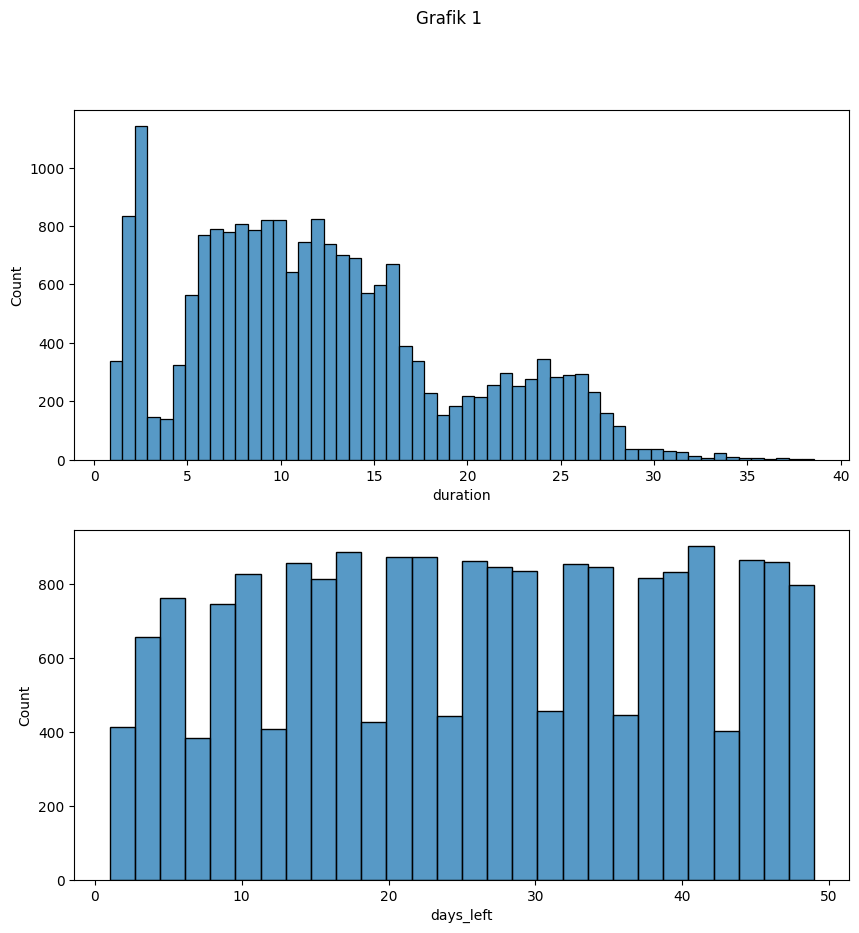

In [249]:
# *train_df* dagi sonli ustundagi qiymatlar larni vizualizatsiya qilamiz
fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
fig.suptitle("Grafik 1")
sns.histplot(ax=ax[0], data=train_df, x='duration')
sns.histplot(ax=ax[1], data=train_df, x='days_left')
plt.show()

In [250]:
#test_df dan 'id' ustunini o'chiramiz
test_df=test_df.drop(columns=['id'],axis=1)
test_df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


# Test qiladigan malumotlarimiz yozuvli ustunlari unique ligini tekshiramiz

In [251]:
for i in uni_ele:
   print(test_df[i].unique())

['Air_India' 'Vistara' 'AirAsia' 'Indigo' 'GO_FIRST' 'SpiceJet']
['AI-765' 'UK-747' 'AI-570' 'I5-974' 'AI-770' 'AI-808' '6E-6051' 'AI-569'
 '6E-7223' 'UK-852' 'G8-7537' 'UK-830' 'AI-804' 'UK-866' 'AI-698' 'UK-860'
 'AI-442' 'UK-988' 'UK-810' 'UK-836' 'UK-659' 'UK-708' 'AI-624' 'UK-898'
 'G8-511' 'I5-2991' 'UK-824' 'UK-894' '6E-6684' 'UK-808' 'G8-2508'
 'UK-706' 'AI-538' 'UK-823' '6E-139' 'UK-821' '6E-606' 'UK-859' 'UK-811'
 'UK-940' 'UK-828' '6E-285' 'AI-402' 'I5-1426' 'G8-227' 'UK-845' 'UK-953'
 'UK-874' '6E-866' 'UK-814' 'AI-9547' 'AI-9720' 'I5-767' '6E-847' 'UK-876'
 '6E-379' '6E-5002' 'AI-526' '6E-893' 'UK-944' 'UK-832' 'AI-678' 'I5-631'
 'AI-660' 'AI-868' '6E-6205' 'UK-820' 'UK-975' 'G8-312' 'UK-826' 'AI-806'
 'SG-679' '6E-5368' 'UK-970' 'UK-985' 'AI-687' 'UK-930' 'UK-772' 'UK-910'
 'AI-637' 'UK-981' 'AI-516' 'UK-705' 'UK-951' 'I5-410' 'UK-813' 'AI-766'
 'AI-505' 'UK-950' 'AI-888' 'G8-512' 'G8-119' 'G8-461' '6E-6366' 'AI-773'
 'UK-877' 'G8-392' 'UK-873' 'AI-525' '6E-588' '6E-6217'

In [252]:
#test_df danham 'flight' ustunini o'chirami
test_df=test_df.drop(columns=['flight'],axis=1)
test_df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


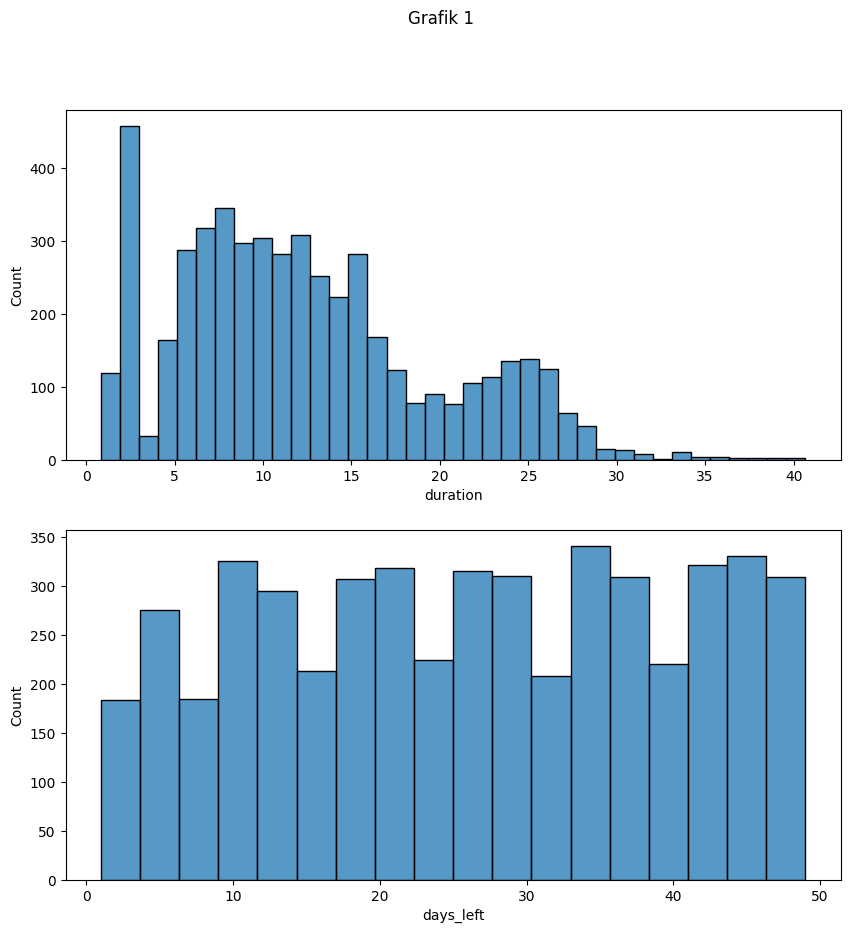

In [253]:
# *test_df* dagi sonli ustundagi qiymatlar larni vizualizatsiya qilamiz
fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
fig.suptitle("Grafik 1")
sns.histplot(ax=ax[0], data=test_df, x='duration')
sns.histplot(ax=ax[1], data=test_df, x='days_left')
plt.show()

In [254]:
#sonli ustunlarimizni standartizatsiya qilamiz
numeric_cols = ["duration", "days_left"]
transformer = ColumnTransformer([
        ("scaler", MinMaxScaler(), numeric_cols)
    ])

In [255]:
'''Matinli ustunlardagi qiymatlarni son turiga o'tqazib
standatizatsiya qilamiz va sonli ustunlar  bilan bitta daframega quyidagi yozilgan funksiya bilan birlashtiramiz
birlashtiramiz birlashtiramiz'''
def data_convertor(data, str_cols, num_cols=None):
    prepared = pd.DataFrame({}, index=data.index)
    for i in range(len(str_cols)):
        col = pd.get_dummies(data[str_cols[i]])
        col = col.astype(np.int8)
        prepared = pd.merge(prepared, col, left_index=True, right_index=True)
    if num_part is not None:
        return pd.merge(prepared, num_cols, left_index=True, right_index=True)
    else: return prepared

# matnli ustunlar
str_cols = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]

# datani raqamli qismini ajratib olamiz
num_cols = train_df[["duration", "days_left", "price"]]

# "duration" va "days_left" ustunlarini standardlashtirib olamiz
num_cols.loc[:, numeric_cols] = transformer.fit_transform(num_cols)
#ML ga tayyor data set
prepared_trainset = data_convertor(train_df, str_cols, num_cols)

prepared_trainset.head()

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore_x,Chennai_x,Delhi_x,Hyderabad_x,...,Chennai_y,Delhi_y,Hyderabad_y,Kolkata_y,Mumbai_y,Business,Economy,duration,days_left,price
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0.355497,0.416667,7212
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0.024371,0.125000,5292
2,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0.231788,0.083333,60553
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0.156821,0.562500,5760
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0.030993,0.062500,10712


In [256]:
# Ustunlar ko
prepared_trainset.corrwith(train_df['price']).abs().sort_values(ascending=False)

price              1.000000
Economy            0.937868
Business           0.937868
Vistara            0.360410
Indigo             0.283825
duration           0.213158
one                0.197830
GO_FIRST           0.191557
zero               0.187030
AirAsia            0.174272
SpiceJet           0.115649
days_left          0.102545
Late_Night_y       0.097337
Air_India          0.070827
Early_Morning_y    0.070650
Delhi_y            0.064619
Evening_y          0.063804
two_or_more        0.060589
Afternoon_y        0.048976
Afternoon_x        0.045462
Night_x            0.045041
Morning_y          0.044133
Delhi_x            0.041629
Kolkata_y          0.041162
Late_Night_x       0.037237
Mumbai_x           0.036125
Hyderabad_x        0.030848
Chennai_y          0.020512
Early_Morning_x    0.020004
Bangalore_x        0.016966
Morning_x          0.016467
Hyderabad_y        0.016315
Bangalore_y        0.015385
Night_y            0.013207
Evening_x          0.009324
Kolkata_x          0

#*ML* qismiga o'tamiz

In [257]:
# Malumotlarni o'qitish uchun x va y ga ajratib olamiz
X = prepared_trainset.drop("price", axis=1)
y = prepared_trainset["price"].copy()

#Modelni baholash uchun datasetni train va test setlarga bo'lib olamiz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)


In [258]:
#Absolyut va O'tracha kvadratik xatolarni ekranga chiqarish uchun funksiya
def print_errors(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print("MAE:", mae)
    print(f'RMSE: {np.sqrt(mse)}')

In [259]:
# ML xgboost algoritmi
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
# natijalarni ekranga chiqaramiz
print_errors(y_test, y_pred)
#get_result_df(y_test, y_pred).head()

MAE: 2166.2479576416017
RMSE: 3978.2452886994083


In [260]:
# RandomForestRegressor algoritmi
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print_errors(y_test, y_pred)
#get_result_df(y_test, y_pred).head()

MAE: 2089.8840931309524
RMSE: 4089.1663466843856


In [261]:
# matnli ustunlar
str_cols = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]

# raqamli ustunlar
num_cols = ["duration", "days_left"]

# datani raqamli qismini ajratib olamiz
num_part = test_df[num_cols]

# "duration" va "days_left" ustunlarini standardlashtirib olamiz
num_part.loc[:, num_cols] = transformer.fit_transform(num_part)

# funksiyadan qaytgan tayyor datani o'zgaruvchiga saqlab olamiz
prepared_testset = data_convertor(test_df, str_cols, num_part)

y_pred_data = rf_model.predict(prepared_testset)






#Chiquvchi faylni shakillantiramiz

In [262]:
# natijani faylga yuklaymiz
# Randomforest algoritmi yaxshiroq natija berdi
sample['price'] = y_pred_data
sample.to_csv('prediction_from_alibek.csv', index=False)
